In [7]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc
from IPython.display import HTML

def hyperplane(x,y,a,b,c,d):
    return -a/d - b/d * x - c/d * y

def kartesianIntoPolar(vectorList):
    newVectorList = []
    for vec in vectorList:
        x = vec[0]
        y = vec[1]
        radius = np.sqrt( x**2 + y**2 )
        if x==0 and y>0:
            angle = np.pi/2
        if x==0 and y<0:
            angle = 3/2 * np.pi
        if x>0 and y>=0:
            angle = np.arctan(y/x)
        if x>0 and y<0:
            angle = 2 * np.pi + np.arctan(y/x)
        if x<0:
            angle = np.pi + np.arctan(y/x)
        newVectorList.append([radius, angle, vec[2]])
    return newVectorList

def vectorListIntoWeight(vectorList):
    # vectorslist -> list of np-arrays of weight-vectors
    newVectorList = []
    for vec in vectorList:
        newVectorList.append(np.array([[1]] + [[i] for i in vec]))
    return newVectorList

def plotIn3D(vectorsPositive,vectorsNegative,spaceName,ax1, ax2, ax3,colorPos,colorNeg):
    xValues = [xValue[0] for xValue in (vectorsPositive + vectorsNegative)]
    yValues = [yValue[1] for yValue in (vectorsPositive + vectorsNegative)]
    zValues = [zValue[2] for zValue in (vectorsPositive + vectorsNegative)]

    xmin = min(xValues) - 0.5
    xmax = max(xValues) + 0.5
    ymin = min(yValues) - 0.5
    ymax = max(yValues) + 0.5
    zmin = min(zValues) - 0.5
    zmax = max(zValues) + 0.5

    ax = plt.axes(projection="3d")        

    plt.title(spaceName)
    xLabel = ax.set_xlabel(ax1)
    yLabel = ax.set_ylabel(ax2)
    zLabel = ax.set_zlabel(ax3)


    for vec in vectorsPositive:
        ax.scatter(vec[0],vec[1],vec[2], color=colorPos)
    for vec in vectorsNegative:
        ax.scatter(vec[0],vec[1],vec[2], color=colorNeg)

    plt.show()
    return None

In [33]:
# enter vectors in euclidean space
vectorsPositive = [
    [1, 3, 1],
    [4, -1, 1]
    #[-4, 1, -3],
    #[1, -2, 1]
]

vectorsNegative = [
    [-4, 1, -3],
    [1, -2, 1]
    #[1, 3, 1],
    #[4, -1, 1]
]

initialWeight = [
    [10,0,0,0]
]


# transform vectors to weight (why on earth should you do that?)
vecPos, vecNeg = vectorListIntoWeight(vectorsPositive), vectorListIntoWeight(vectorsNegative)

initialWeight = np.array([[i] for i in initialWeight[0]])

#print("Vectors with positive classification")
#for vec in vecPos:
#    print(vec, "\n")
#print("Vectors with negative classification")
#for vec in vecNeg:
#    print(vec, "\n")

<IPython.core.display.Javascript object>


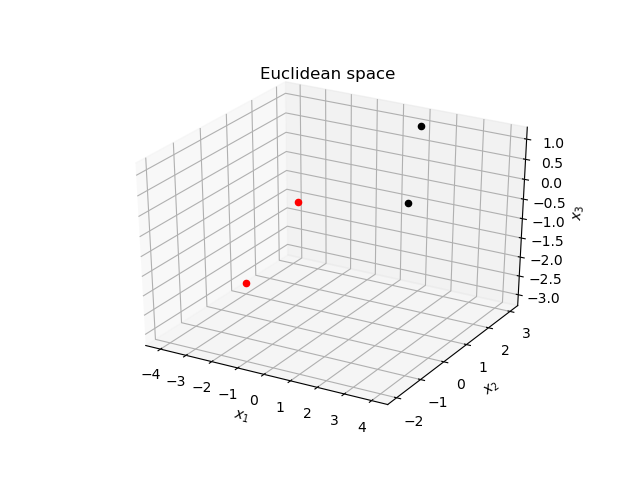

In [30]:
# plot vectors in euclidean space

%matplotlib notebook
#%matplotlib inline
plotIn3D(vectorsPositive,vectorsNegative,"Euclidean space",'$x_1$','$x_2$','$x_3$',"red","black")

In [35]:
# perceptron algorithm

aPos, aNeg = vectorListIntoWeight(vectorsPositive), vectorListIntoWeight(vectorsNegative)

# perceptron output
ergPos, ergNeg = [], []

for vec in aPos:
    ergPos.append(np.sum(initialWeight*vec))

for vec in aNeg:
    ergNeg.append(np.sum(initialWeight*vec))

weightAdjusted = initialWeight
# stores weight for animation
weightStored = []
weightStored.append(initialWeight)

countAngleAdjustment = 0

while (any(i<0 for i in ergPos) or any(i>=0 for i in ergNeg)):
    for i in range(len(ergNeg)):
        ergNeg[i] = np.sum(weightAdjusted*aNeg[i])
        if ergNeg[i] >= 0:
            weightAdjusted = weightAdjusted - aNeg[i]
            weightStored.append(weightAdjusted)
            print("Negative vector ", i, " output: ", ergNeg[i], " new vector:\n", weightAdjusted)
        else:
            print("Negative vector ", i, " output: ", ergNeg[i], " ----- ")
    for i in range(len(ergPos)):
        ergPos[i] = np.sum(weightAdjusted*aPos[i])
        if ergPos[i] < 0:
            weightAdjusted = weightAdjusted + aPos[i]
            weightStored.append(weightAdjusted)
            print("Positive vector ", i, " output: ", ergPos[i], " new vector:\n", weightAdjusted)
        else:
            print("Positive vector ", i, " output: ", ergPos[i], " ----- ")

print("The solution is:\n", weightAdjusted)

#print("The radius was adjusted by ", countAngleAdjustment, " times." )

Negative vector  0  output:  10  new vector:
 [[ 9]
 [ 4]
 [-1]
 [ 3]]
Negative vector  1  output:  18  new vector:
 [[8]
 [3]
 [1]
 [2]]
Positive vector  0  output:  16  ----- 
Positive vector  1  output:  21  ----- 
Negative vector  0  output:  -9  ----- 
Negative vector  1  output:  11  new vector:
 [[7]
 [2]
 [3]
 [1]]
Positive vector  0  output:  19  ----- 
Positive vector  1  output:  13  ----- 
Negative vector  0  output:  -1  ----- 
Negative vector  1  output:  4  new vector:
 [[6]
 [1]
 [5]
 [0]]
Positive vector  0  output:  22  ----- 
Positive vector  1  output:  5  ----- 
Negative vector  0  output:  7  new vector:
 [[5]
 [5]
 [4]
 [3]]
Negative vector  1  output:  5  new vector:
 [[4]
 [4]
 [6]
 [2]]
Positive vector  0  output:  28  ----- 
Positive vector  1  output:  16  ----- 
Negative vector  0  output:  -12  ----- 
Negative vector  1  output:  -2  ----- 
Positive vector  0  output:  28  ----- 
Positive vector  1  output:  16  ----- 
The solution is:
 [[4]
 [4]
 [6]
 [2]

<IPython.core.display.Javascript object>


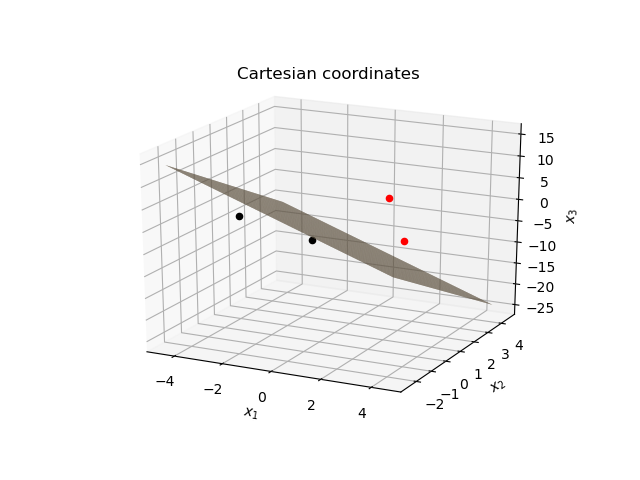

In [36]:
plotIn3D(vectorsPositive,vectorsNegative,"Cartesian coordinates","$x_1$", "$x_2$", "$x_3$","red","black")


xValues = [xValue[0] for xValue in (vectorsPositive + vectorsNegative)]
yValues = [yValue[1] for yValue in (vectorsPositive + vectorsNegative)]
zValues = [zValue[2] for zValue in (vectorsPositive + vectorsNegative)]

xmin = min(xValues) - 0.5
xmax = max(xValues) + 0.5
ymin = min(yValues) - 0.5
ymax = max(xValues) + 0.5
zmin = min(zValues) - 0.5
zmax = max(zValues) + 0.5

x = np.linspace(xmin, xmax, 50)
y = np.linspace(ymin, ymax, 50)

X, Y = np.meshgrid(x, y)

Z = hyperplane(X,Y,weightAdjusted[0][0],weightAdjusted[1][0],weightAdjusted[2][0],weightAdjusted[3][0])

ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, color='navajowhite')

for vec in vectorsPositive:
    ax.scatter(vec[0],vec[1],vec[2], color="red")
for vec in vectorsNegative:
    ax.scatter(vec[0],vec[1],vec[2], color="black")

plt.title("Cartesian coordinates")
xLabel = ax.set_xlabel("$x_1$")
yLabel = ax.set_ylabel("$x_2$")
zLabel = ax.set_zlabel("$x_3$")

plt.show()